<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/DataMining_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1   Evaluation**

In [ ]:
e = [1, 2, 3, 6, 6, 7, 10, 11]
t = 0
for i in e:
    for j in e:
        t += (i - j)**2
t        

1464

In [ ]:
def evaluation(c, s, n):
    p = s/n
    q = 1 - p
    pr = round((1 - (c/100)) / 2, 2) * 100
    print(pr, ((1 - (c/100)) / 2) * 100)
    roc_table = {0.1: 3.09, 0.5: 2.58, 1: 2.33, 5: 1.65, 10: 1.28, 20: 0.84, 40: 0.25}
    z = roc_table.get(pr)
    print(f'Pr[X>=Z] = {pr},  Z == {z}, x is [-{z} <= x <= {z}]')
    temp = (p * q / n) ** 0.5 
    res_1 = p - (temp * z)
    res_2 = p + (temp * z)
    print(f'We are % {c} sure that X is in [{res_1} <= X <= {res_2}], and temp is: {temp}')

In [ ]:
# Write DECIMAL numbers in INT(*100),  The CODE will FIX It
"""evaluation(90, 70, 100)"""
evaluation(98, 590, 1000)

1.0 1.0000000000000009
Pr[X>=Z] = 1.0,  Z == 2.33, x is [-2.33 <= x <= 2.33]
We are % 98 sure that X is in [0.5537611960738216 <= X <= 0.6262388039261784], and temp is: 0.01555313473226539


# **2 ROC**

In [ ]:
def ROC(tp, fn, tn, fp):
    accuracy = (tp + tn) / (tp + fn + fp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_measure = 2 * precision * recall / (precision + recall)
    fallout = fp / (tp + fp)
    fpr = fp / (fp + tn)
    print(f'accuracy: {accuracy}\nprecision: {precision}\nrecall(TPR): {recall}\nf_measure: {f_measure}\nfallout: {fallout}\nFPR: {fpr}')

In [ ]:
ROC(5,0,4,1)

accuracy: 0.9
precision: 0.8333333333333334
recall(TPR): 1.0
f_measure: 0.9090909090909091
fallout: 0.16666666666666666
FPR: 0.2


In [ ]:
#actual_class: identifies if X's class is positive(1) or negative(0)
# clf: all posibilities of X(write DESIMAL values in INT, The Code Will FIX It)
def ROC_classifier(actual_class, clf, Threshold=0.5):
    data = [(i, j/100) for i, j in zip(actual_class, clf)]
    positive = [i for i in data if i[1] >= Threshold]
    negative = [i for i in data if i[1] < Threshold]
    true_positive = [k[1] for k in positive if k[0] == 1]
    false_positive = [k[1] for k in positive if k[0] == 0]
    false_negative = [k[1] for k in negative if k[0] == 1]
    true_negative = [k[1] for k in negative if k[0] == 0]
    print(f'true_positive: {true_positive}\nfalse_positive: {false_positive}\nfalse_negative: {false_negative}\ntrue_negative: {true_negative}\n')
    print(f'TP: {len(true_positive)}\nFP: {len(false_positive)}\nFN: {len(false_negative)}\nTN: {len(true_negative)}\n')
    print(f"""ROC Table:
    {len(true_positive)}    {len(false_negative)}
    {len(false_positive)}    {len(true_negative)}""")

In [ ]:
# Write DECIMAL clf in INT(*100),  The CODE will FIX It
# ROC_classifier([1,1, 0,0,1,1,0,0,1,0], [73, 69,44,55,67,47,8,15,45,35], 0.5)
# ROC(3, 2, 4, 1)
# ROC_classifier([1,1, 0,0,1,1,0,0,1,0], [61, 3, 68, 31, 45, 9, 38, 5, 1, 4], 0.5)
# ROC(1, 4, 4, 1)
ROC_classifier([1,1, 0,0,1,1,0,0,1,0], [73, 69,44,55,67,47,8,15,45,35], 0.1)
ROC(5, 0, 1, 4)

true_positive: [0.73, 0.69, 0.67, 0.47, 0.45]
false_positive: [0.44, 0.55, 0.15, 0.35]
false_negative: []
true_negative: [0.08]

TP: 5
FP: 4
FN: 0
TN: 1

ROC Table:
    5    0
    4    1
accuracy: 0.6
precision: 0.5555555555555556
recall(TPR): 1.0
f_measure: 0.7142857142857143
fallout: 0.4444444444444444, FPR: 0.8


In [ ]:
# Enter The Respond rate, A, B, step in int, The Code will devide it in 100
# Enter target, data_count numbers as it is in the question
def ROC_Combining_Classifiers(data_count, respond_rate, A, B, target):
    sucess = data_count * respond_rate/100
    failed = data_count * (1 - (respond_rate/100))
    best_score = [0, 0, 0, 0]
    # I is FPR
    # J is TPR
    for i in range(A[0], B[0]):
        for j in range(A[1], B[1]):
            fpr, tpr= i/100, j/100
            res = (failed * fpr) + (sucess * tpr)
            if (target - 50 >= res) or (res <= target):
                if best_score[0] < res:
                    k = (fpr-A[0]/100)/((B[0]-A[0])/100)
                    best_score = res, fpr, tpr, k
                    print(best_score)
    return best_score

In [ ]:
"""It Returns 
The Best Score ==> More Closer to Target, Better
FBR ==> X1
TBR ==> X2
K ==> B's decision Rate
if x_example_rate > K ==> A 
else ==> B
"""
ROC_Combining_Classifiers(4000, 6, (10, 20), (25, 60), 800)
# fp, tp = .2, .2
# fp, tp = .18, .42
# (3760 * fp) + (240 * tp)

(424.0, 0.1, 0.2, 0.0)
(426.4, 0.1, 0.21, 0.0)
(428.8, 0.1, 0.22, 0.0)
(431.2, 0.1, 0.23, 0.0)
(433.6, 0.1, 0.24, 0.0)
(436.0, 0.1, 0.25, 0.0)
(438.4, 0.1, 0.26, 0.0)
(440.8, 0.1, 0.27, 0.0)
(443.2, 0.1, 0.28, 0.0)
(445.6, 0.1, 0.29, 0.0)
(448.0, 0.1, 0.3, 0.0)
(450.4, 0.1, 0.31, 0.0)
(452.8, 0.1, 0.32, 0.0)
(455.2, 0.1, 0.33, 0.0)
(457.6, 0.1, 0.34, 0.0)
(460.0, 0.1, 0.35, 0.0)
(462.4, 0.1, 0.36, 0.0)
(464.8, 0.1, 0.37, 0.0)
(467.2, 0.1, 0.38, 0.0)
(469.6, 0.1, 0.39, 0.0)
(472.0, 0.1, 0.4, 0.0)
(474.4, 0.1, 0.41, 0.0)
(476.8, 0.1, 0.42, 0.0)
(479.2, 0.1, 0.43, 0.0)
(481.6, 0.1, 0.44, 0.0)
(484.0, 0.1, 0.45, 0.0)
(486.4, 0.1, 0.46, 0.0)
(488.8, 0.1, 0.47, 0.0)
(491.2, 0.1, 0.48, 0.0)
(493.6, 0.1, 0.49, 0.0)
(496.0, 0.1, 0.5, 0.0)
(498.4, 0.1, 0.51, 0.0)
(500.8, 0.1, 0.52, 0.0)
(503.2, 0.1, 0.53, 0.0)
(505.6, 0.1, 0.54, 0.0)
(508.0, 0.1, 0.55, 0.0)
(510.4, 0.1, 0.56, 0.0)
(512.8, 0.1, 0.57, 0.0)
(515.2, 0.1, 0.58, 0.0)
(517.6, 0.1, 0.59, 0.0)
(519.2, 0.11, 0.44, 0.06666666666666664)
(52

(800.0, 0.2, 0.2, 0.6666666666666667)

In [ ]:
# Try to  run this code in pycharm, It doesn't work here
import turtle
def ROC_graph(actual_class_1, score_1, actual_class_2, score_2):
    t = turtle.Turtle()
    turtle.title("My ROC Graph Turtle")
    # t.shape("turtle")
    # t.shape('arrow')
    t.shape('circle')
    # t.shape("Square")
    # t.shape("Triangle")
    # t.shape("Classic")
    t.speed(10)
    data_1 = [(i, j/100) for i, j in zip(actual_class_1, score_1)]
    data_2 = [(i, j/100) for i, j in zip(actual_class_2, score_2)]
    M1 = [i[0] for i in sorted(data_1, key=lambda x: x[1], reverse=True)]
    M2 = [i[0] for i in sorted(data_2, key=lambda x: x[1], reverse=True)]
    print(f'M1 { [i for i in sorted(data_1, key=lambda x: x[1], reverse=True)]}')
    print(f'M2 { [i for i in sorted(data_2, key=lambda x: x[1], reverse=True)]}')
    color = ['dark blue', 'red']
    for j, m in enumerate([M1, M2]):
        t.fillcolor("yellow")
        t.pencolor(color[j])
        t.goto(-200, -200)
        head = 2
        for r in m:
            if r == 1:
                if head != 1:
                    t.left(90)
                    head=1
            else:
                if head == 1:
                    t.right(90)
                    head = 0
            t.stamp()
            t.forward(50)
    turtle.done()
 
ROC_graph([1,1, 0,0,1,1,0,0,1,0], [73, 69,44,55,67,47,8,15,45,35], [1,1, 0,0,1,1,0,0,1,0], [61, 3, 68, 31, 45, 9, 38, 5, 1, 4])

# **3 K Nearest Neighbors**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
 
 
def normalization(x, choise=0):
    if choise == 0:   # min_max  
        return (x - np.min(x)) / (np.max(x) - np.min(x))
    elif choise == 1:
        return (x - np.mean(x)) / np.std(x)

In [ ]:
def IB1(x1, x2, points_class,target_tuple, k=3, norm_choise=-1, dist_choise=0):
    target = pd.DataFrame(list(zip([target_tuple[0]]*len(x1), [target_tuple[1]]*len(x1))), columns=['X1', 'X2'])
    if len(x1) != len(x2) or len(x1) != len(points_class) or len(x2) != len(points_class):
        return 'You had some error in counting the points'
    data = pd.DataFrame(list(zip(x1, x2, points_class)), columns=['X1', 'X2', 'Y'])
    if norm_choise >= 0:
        data.X1, data.X2 = normalization(data.X1, norm_choise), normalization(data.X2, norm_choise)
    sns.scatterplot(x='X2', y='X1', data=data, hue='Y')
    distance_arr = ((data.X1 - target.X1)**2 + (data.X2 - target.X2)**2)**0.5
    return distance_arr.sort_values()[:k]

3     0.400000
1     1.000000
0     1.004988
11    1.200000
10    1.280625
5     1.345362
13    1.600000
6     1.720465
2     2.009975
4     2.118962
12    2.441311
7     4.001250
9     4.019950
8     5.000000
dtype: float64

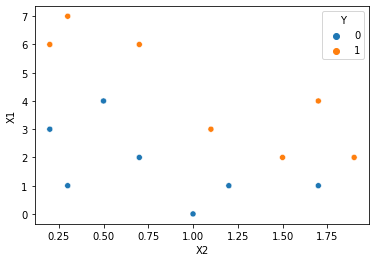

In [ ]:
t1 = [3, 1, 4, 2, 0, 1, 1, 6, 7, 6, 3, 2, 4, 2]
t2 = [0.2 , 0.3, 0.5, 0.7, 1.0, 1.2, 1.7, 0.2, 0.3, 0.7, 1.1, 1.5, 1.7, 1.9]
p_class = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
IB1(t1, t2, p_class, (2, 0.3), len(t1), -1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
def IB2(x1, x2, points_class,target_tuple, norm_choise=-1, dist_choise=0):
    M = len(x1)
    if M != len(x2) or M != len(points_class) or len(x2) != len(points_class):
        return 'You had some error in counting the points'
    data = pd.DataFrame(list(zip(x1, x2, points_class)), columns=['X1', 'X2', 'Y'])
    if norm_choise >= 0:
        data.X1, data.X2 = normalization(data.X1, norm_choise), normalization(data.X2, norm_choise)
    # sns.scatterplot(x='X2', y='X1', data=data, hue='Y')    
    # data = data.sample(frac = 1)    #Shuffle DataFrame
    avg_dis = [data.T[0].to_list()]
    for i in range(1, M):  
        dis_arr = []
        target = data.iloc[i]
        for item in avg_dis:
           dist = ((item[0] - target.X1)**2 + (item[1] - target.X2)**2)**0.5
           dis_arr.append((item[-1], dist)) 
        dis_arr.sort(key=lambda x: x[-1])   
        if dis_arr[0][0] != target.Y:
            avg_dis.append(data.T[i].to_list())
    data_df = pd.DataFrame(avg_dis, columns=['X1', 'X2', 'Y'])
    sns.scatterplot(x='X1', y='X2', data=data_df, hue='Y')
 
    main_target = pd.DataFrame(list(zip([target_tuple[0]]*len(avg_dis), [target_tuple[1]]*len(avg_dis))), columns=['X1', 'X2'])
    dist_list = ((data_df.X1 - main_target.X1)**2 + (data_df.X2- main_target.X2)**2)**0.5
    dist_list = dist_list.sort_values()
    chosenOnes_index = dist_list.index.to_list()[0]
    chosenOne = data_df.iloc[chosenOnes_index].Y
    print(f'Central Points:\n{data_df}\nSelected Point Distance is:\n{dist_list}\nSelected Point Class is:\t{chosenOne}\n')
    return data_df

Central Points:
    X1  X2  Y
0   32   6  1
1   64  13  2
2   32   4  0
3   64   6  0
4   64  12  1
5  128   6  2
Selected Point Distance is:
2     30.227306
0     30.536699
3     62.261465
4     63.094295
1     63.287361
5    126.128863
dtype: float64
Selected Point Class is:	0



,X1,X2,Y
0,32,6,1
1,64,13,2
2,32,4,0
3,64,6,0
4,64,12,1
5,128,6,2


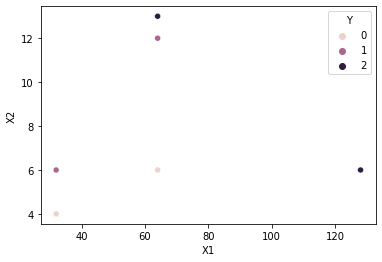

In [ ]:
# t1 = [25, 85, 45, 30, 50, 50, 70, 25, 50, 45, 50, 60]
# t2 = [60, 140, 60, 260, 75, 120, 110, 400, 100, 350, 275, 260]
# p_class = [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
t1 = [32, 64, 64, 32, 96, 128, 128, 32, 64, 64, 128]
t2 = [6, 4, 13, 11, 14 , 13, 18, 4, 6, 12, 6]
p_class = [1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2]
s = IB2(t1, t2, p_class, (2, 0.3), -1)
s

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
 
 
def IB3(x1, x2, points_class,target_tuple, lower_t=0, upper_t=1, norm_choise=-1, dist_choise=0):
    M = len(x1)
    if M != len(x2) or M != len(points_class) or len(x2) != len(points_class):
        return 'You had some error in counting the points'
    data = pd.DataFrame(list(zip(x1, x2, points_class)), columns=['X1', 'X2', 'Y'])
    if norm_choise >= 0:
        data.X1, data.X2 = normalization(data.X1, norm_choise), normalization(data.X2, norm_choise)
    # sns.scatterplot(x='X2', y='X1', data=data, hue='Y')    
    # data = data.sample(frac = 1)    #Shuffle DataFrame
 
    points = np.zeros(M*2).reshape(M, 2)
    avg_dis = [data.T[0].to_list()]
 
    for i in range(1, M):  
        dis_arr = []
        target = data.iloc[i]
        for ind, item in enumerate(avg_dis):
            dist = ((item[0] - target.X1)**2 + (item[1] - target.X2)**2)**0.5
            dis_arr.append((item[-1], ind, dist)) 
        dis_arr.sort(key=lambda x: x[-1])   
        nearest_one = dis_arr[0]
        avg_dis.append(data.T[i].to_list())
        if nearest_one[0] == target.Y:
            points[nearest_one[1]][1] += 1
        else:
            points[nearest_one[1]][0] += 1
    print(points)        
    selected_points = [(ind, [i[0], i[1]]) for ind, i in enumerate(points) if (i[0] == lower_t) and (i[1] >= upper_t)]
    print(selected_points)
    selectedOnes = [avg_dis[i[0]] for i in selected_points]
    data_df = pd.DataFrame(selectedOnes, columns=['X1', 'X2', 'Y'])
    sns.scatterplot(x='X1', y='X2', data=data_df, hue='Y')
 
    main_target = pd.DataFrame(list(zip([target_tuple[0]]*len(selectedOnes), [target_tuple[1]]*len(selectedOnes))), columns=['X1', 'X2'])
    dist_list = ((data_df.X1 - main_target.X1)**2 + (data_df.X2- main_target.X2)**2)**0.5
    dist_list = dist_list.sort_values()
    
    chosenOnes_index = dist_list.index.to_list()[0]
    chosenOne = data_df.iloc[chosenOnes_index].Y
    print(f'Central Points:\n{data_df}\nSelected Point Distance is:\n{dist_list}\nSelected Point Class is:\t{chosenOne}\n')
    return selected_points

[[1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 2.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]
[(2, [0.0, 1.0]), (3, [0.0, 2.0]), (7, [0.0, 1.0]), (10, [0.0, 1.0])]
Central Points:
   X1   X2  Y
0  45   60  0
1  30  260  1
2  25  400  1
3  50  275  1
Selected Point Distance is:
0     73.573705
1    261.205073
3    278.862134
2    400.361199
dtype: float64
Selected Point Class is:	0



[(2, [0.0, 1.0]), (3, [0.0, 2.0]), (7, [0.0, 1.0]), (10, [0.0, 1.0])]

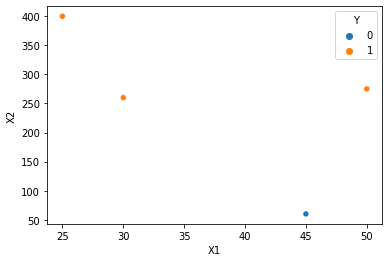

In [ ]:
t1 = [25, 85, 45, 30, 50, 50, 70, 25, 50, 45, 50, 60]
t2 = [60, 140, 60, 260, 75, 120, 110, 400, 100, 350, 275, 260]
p_class = [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
s = IB3(t1, t2, p_class, (2, 0.3), 0, 1, -1)
s

# 4 **linearClassification**

In [ ]:
import numpy as np
import pandas as pd
def perceptron(x1, x2, points_class, alpha=0.1, iterations=20):
    w = [0, 0, 0]
    for i in range(iterations):
        for item in zip(x1, x2, points_class):
            if np.sign((item[0] * w[0]) + (item[1] * w[1])) != item[2]:
                w[0] = w[0] + (alpha*item[2] * item[0])
                w[1] = w[1] + (alpha*item[2] * item[1])
                w[2] = w[2] + (alpha*item[2])
    return w

In [ ]:
t1 = [3, 1, 4, 2, 0, 1, 1, 6, 7, 6, 3, 2, 4, 2]
t2 = [0.2 , 0.3, 0.5, 0.7, 1.0, 1.2, 1.7, 0.2, 0.3, 0.7, 1.1, 1.5, 1.7, 1.9]
p_class = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
s = perceptron(t1, t2, p_class)
s

[0.6000000000000001, 0.020000000000000004, 0.1]

# 5 **Clustering**

In [ ]:
Minkowski_distance = lambda p, dist_power: np.sum([np.abs(m1 - m2) ** dist_power for m1, m2 in p]) ** (1/dist_power)

In [ ]:
r1 = [0, 2]
r2 = [2, 3]
p = [(t1, t2) for t1, t2 in zip(r1, r2)]
Minkowski_distance(p, 2)

2.23606797749979

In [ ]:
import numpy as np
def Minkowski_distance_table(x1, x2, normalization_choice=0, dist_power=1):
    if normalization_choice == 0:
        X1, X2 = x1, x2
    elif normalization_choice == 1:
        X1 = (x1 - np.mean(x1, axis=0)) / np.std(x1, axis=0)
        X2 = (x2 - np.mean(x2, axis=0)) / np.std(x2, axis=0)    
    else:
        X1 = (x1 - np.min(x1, axis=0)) / (np.max(x1, axis=0) - np.min(x1, axis=0))
        X2 = (x2 - np.min(x2, axis=0)) / (np.max(x2, axis=0) - np.min(x2, axis=0))
    
    p = [(t1, t2) for t1, t2 in zip(X1, X2)]
    m = len(p)
    dis_table = np.array([0.0]*(m**2)).reshape(m, m)
    for i in range(m):
        for j in range(i, m):
            res = np.sum([np.abs(m1 - m2) ** dist_power for m1, m2 in zip(p[i], p[j])]) ** (1/dist_power)
            dis_table[i, j] = dis_table[j, i] = res
    return dis_table

In [ ]:
r1 = [0, 2, 3, 5]
r2 = [2, 0, 1, 1]
Minkowski_distance_table(r1, r2, 0, 2)

array([[0.        , 2.82842712, 3.16227766, 5.09901951],
       [2.82842712, 0.        , 1.41421356, 3.16227766],
       [3.16227766, 1.41421356, 0.        , 2.        ],
       [5.09901951, 3.16227766, 2.        , 0.        ]])

In [ ]:
# x1, x2 are both strings in here
def binary_similarity(x1, x2):
    M00, M01, M10, M11 = 0, 0, 0, 0
    if len(x1) == len(x2):
        print(f'len_data: {len(x1)}')
    else:
        return f'All data must be the same size, difference is:(x1 - x2): {len(x1)-len(x2)}'
    for i, j in zip(list(x1), list(x2)):
        if i == j =='0':
            M00 += 1
        elif i == j == '1':    
            M11 += 1
        elif i == '0' and j == '1':
            M01 += 1
        elif i == '1' and j == '0':
            M10 += 1
        else:
            return 'It is not binary'    
    print(f'  M00: {M00}\n  M10: {M10}\n  M01: {M01}\n  M11: {M11}')    
    SMC = (M11 + M00) / (M00 + M01 + M10 + M11) 
    JC = (M11) / (M01 + M10 + M11)
    print(f'  SMC:  {SMC}\n  JC:  {JC}')

In [ ]:
# b1, b2 are both strings
b1 = '1000000000'
b2 = '0000001001'
binary_similarity(b1, b2)

len_data: 10
  M00: 7
  M10: 1
  M01: 2
  M11: 0
  SMC:  0.7
  JC:  0.0


In [ ]:
import numpy as np
def Cosine_similarity(d1, d2):
    d1 = [d/100 for d in d1]
    d2 = [d/100 for d in d2]
    len_d1 = sum([i**2 for i in d1]) ** 0.5
    len_d2 = sum([k**2 for k in d2]) ** 0.5
    print(len_d1, len_d2, np.dot(d1, d2))
    return np.dot(d1, d2) / (len_d1 * len_d2)

In [ ]:
# Write DECIMAL numbers in INT(*100),  The CODE will FIX It
D1 = [40, 33, 0, 0, 17]
D2 = [0, 0, 33, 100, 33]
Cosine_similarity(D1, D2)

0.5457105459856901 1.1035397591387452 0.056100000000000004


0.09315636410904708

# **Recommenders**

In [ ]:
import numpy as np
def Cosine_similarity(d1, d2):
    # d1 = [d/100 for d in d1]
    # d2 = [d/100 for d in d2]
    len_d1 = sum([i**2 for i in d1]) ** 0.5
    len_d2 = sum([k**2 for k in d2]) ** 0.5
    print(len_d1, len_d2, np.dot(d1, d2))
    return np.dot(d1, d2) / (len_d1 * len_d2)

In [ ]:
# Write DECIMAL numbers in INT(*100),  The CODE will FIX It
D1 = [1, 2, 3, 5, 8]
# D2 = [.1, .2, .3, .5, .8]
D2 = [.11, .12, .13, .15, .18]

Cosine_similarity(D1, D2)

10.14889156509222 0.31352830813181765 2.9299999999999997


0.9208147111895181

In [ ]:
Euclidean_distance = lambda p: np.sum([(m1 - m2) ** 2 for m1, m2 in p]) ** 0.5
Similarity_distance= lambda p: 1 / (1 + Euclidean_distance(p))
Normalized = lambda f: f - np.mean(f)

In [ ]:
x = [1, 2, 3, 5, 8]
y = [.1, .2, .3, .5, .8]
x, y = Normalized(x), Normalized(y)
p = [(t1, t2) for t1, t2 in zip(x, y)]
# Similarity_distance(p)
# Euclidean_distance(p)
# Cosine_similarity(x, y)

In [ ]:
# Cosine_similarity(D1, D2)
x, y

(array([-2.8, -1.8, -0.8,  1.2,  4.2]),
 array([-0.28, -0.18, -0.08,  0.12,  0.42]))

In [ ]:
def Pearson_Correlation_Formula_1(x, y):
    head = np.sum(np.dot(Normalized(x), Normalized(y))) 
    tail = np.dot(np.sum([(m1 - np.mean(x)) ** 2 for m1 in x]) ** 0.5, np.sum([(m1 - np.mean(y)) ** 2 for m1 in y]) ** 0.5)
    print(f'head is: {head}, tail is: {tail}')
    return head / tail

In [ ]:
def Pearson_Correlation_Formula_2(x, y):
    m = len(x)
    x, y = np.array(x), np.array(y)
    head = np.dot(x, y) - (sum(x)*sum(y)/m)
    tail = (sum(x**2)-((sum(x)**2)/m)) * (sum(y**2)-((sum(y)**2)/m))**.5
    print(f'{np.dot(x, y)} - {(sum(x)*sum(y)/m)} / {(sum(x**2)-((sum(x)**2)/m))} * {(sum(y**2)-((sum(y)**2)/m))}')
    # print(head, tail)
    return head / tail

In [ ]:
f1 = [3.5, 3.5, 2.5]
f2 = [4.5, 4.0, 1.0]
# print(sum(f2))
# Pearson_Correlation_Formula_1(f1, f2)
Pearson_Correlation_Formula_2(f1, f2)

32.25 - 30.083333333333332 / 0.6666666666666679 * 7.166666666666668


1.2140169724111445

In [ ]:
movies_name=['Night', 'Lady', 'Luck']
['Lady', 'Snakes', 'Superman', 'Night', 'you', 'Luck']
target_ratings=[None, None, None]
peoples_ratings={
    'Rose': [3.0, 2.5, 3.0], 
    'Seymour': [3.0, 3.0, 1.5],
    'Puig': [4.5, None, 3.0], 
    'LaSalle': [3.0, 3.0, 2.0],
    'Matthews': [3.0, 3.0, None]
}
def Recomending_items_table(target_ratings):


2
3
4
iiii
None
3
